<a href="https://www.kaggle.com/lanukahjo/eda-feature-engineering-catboost?scriptVersionId=83871994" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tps12-pseudolabels/tps12-pseudolabels_v2.csv
/kaggle/input/tps12-pseudolabels/tps12-pseudolabels_v1.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95673.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95671.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95690.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95674.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95683.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95675.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95696.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95680.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95679.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95682.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95690a.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95686.csv
/kaggle/input/tps12-pseudolabels/subs/subs/0.95687.csv
/kaggle/input/tps12-pseudolabels/source_submissions/06.csv
/kaggle/input/tps12-pseudolabels/source_submissions/05.csv
/kaggle/input/tps12-pseudolabels/source_submissi

In [2]:
#installing intel optimizations for scikit-learn
!pip install -U scikit-learn scikit-learn-intelex >> z_pip.log
!pip install delayed

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.0 which is incompatible.
hypertools 0.7.0 requires scikit-learn!=0.22,<0.24,>=0.19.1, but you have scikit-learn 1.0.2 which is incompatible.
     |████████████████████████████████| 85 kB 352 kB/s            


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
# importing relevant modules and classes
from sklearn.preprocessing import StandardScaler,LabelEncoder, RobustScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [5]:
# Loading Raw data
pseudo_df = pd.read_csv('../input/tps12-pseudolabels/tps12-pseudolabels_v2.csv')
train_df_inter = pd.read_csv('../input/tabular-playground-series-dec-2021/train.csv')
test_df = pd.read_csv('../input/tabular-playground-series-dec-2021/test.csv')

In [6]:
train_df = pd.concat([train_df_inter,pseudo_df],ignore_index=True)
if 'pseudo_df' in globals():
    del pseudo_df
if 'train_df_inter' in globals():
    del train_df_inter

#### Printing first 10 rows 
Data definitions here https://www.kaggle.com/c/forest-cover-type-prediction/data

In [7]:
train_df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2
5,5,3115,144,2,415,61,3371,223,231,131,...,0,0,0,0,0,0,0,0,0,1
6,6,2930,61,5,312,32,3731,225,248,163,...,0,0,0,0,0,0,0,0,0,2
7,7,3208,94,4,187,63,7151,231,228,173,...,0,0,0,0,0,0,0,0,0,2
8,8,3182,67,12,126,22,3098,240,226,121,...,0,0,0,0,0,0,0,0,0,1
9,9,2892,46,16,231,73,4591,231,249,106,...,0,0,0,0,0,0,0,0,0,2


##### Summary of columns in the data

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4984711.0,2.493836e+06,1.441196e+06,0.0,1246177.5,2492355.0,3738532.5,4999999.0
Elevation,4984711.0,2.978214e+03,3.001171e+02,1773.0,2755.0,2966.0,3222.0,4383.0
Aspect,4984711.0,1.517233e+02,1.102961e+02,-33.0,60.0,123.0,248.0,407.0
Slope,4984711.0,1.506233e+01,8.529040e+00,-3.0,9.0,14.0,20.0,64.0
Horizontal_Distance_To_Hydrology,4984711.0,2.699357e+02,2.268361e+02,-92.0,109.0,211.0,360.0,1602.0
Vertical_Distance_To_Hydrology,4984711.0,5.162782e+01,6.825802e+01,-329.0,4.0,31.0,78.0,647.0
Horizontal_Distance_To_Roadways,4984711.0,1.756932e+03,1.327687e+03,-287.0,808.0,1412.0,2348.0,7666.0
Hillshade_9am,4984711.0,2.118028e+02,3.086244e+01,-4.0,197.0,218.0,234.0,301.0
Hillshade_Noon,4984711.0,2.211447e+02,2.217565e+01,49.0,210.0,224.0,237.0,279.0
Hillshade_3pm,4984711.0,1.406266e+02,4.404201e+01,-53.0,115.0,142.0,169.0,272.0


##### We can draw the following observations :-
1. Soil_TypeXX and Wilderness_AreaX are categorical faetures while others are numerical features.  
2. Soil_Type7 and Soil_Type15 are all 0. Hence they must be dropped while creating the model.  
3. The categorical variables are sparse.
4. Some values exist outside of their supposed range.  
    1. The distance values must not be -ve, but they are.  
    2. Slope and Ascent are angles and must be  betwen 0 and 360 but we see outliers.  
    3. Hill shade indices must be between 0 and 255 but we observe values lying outside. 

The 'anaomolies' could have been introduced while creation of systhetic data. The values can be rectified with some feature engineering.

In [9]:
## Creating Relevant features list
soil_features = [x for x in train_df.columns if x.__contains__('Soil')]
wild_features = [x for x in train_df.columns if x.__contains__('Wild')]
distance_features = [x for x in train_df.columns if x.__contains__('Horizontal') or x.__contains__('Vertical')]
hillshade_features = [x for x in train_df.columns if x.__contains__('Hill')]
angle_features = ['Aspect', 'Slope']
numerical_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

#### Exploratory Data Analysis

##### 1. Distribution of target variable

In [10]:
train_df['Cover_Type'].value_counts()

2    2769691
1    1850332
3     271069
7      76729
6      16510
4        379
5          1
Name: Cover_Type, dtype: int64

###### Cover Type 5 has only one record, hence we would be dropping the row.

#### Visual Examination of relation between variables  
Let us explore how the numerical values are distrbuted wrt the forest cover types. Since cover type 5 has only 1 observation, we would be dropping this for visual inspection.

In [11]:
def plot_distribution_by_category(train_df):
    fig, axis = plt.subplots(nrows=5,ncols=2,figsize=(25,25))
    axis = axis.flatten()
    ax_i = 0
    
    for i,X in enumerate(numerical_features):
        plt.xlim(min(train_df[X]),max(train_df[X]))
        sns.kdeplot(x=X,
                    hue='Cover_Type',
                    fill=True,
                    common_norm=False,
                    data=train_df[train_df['Cover_Type'] != 5].sample(frac=0.4),ax=axis[i])

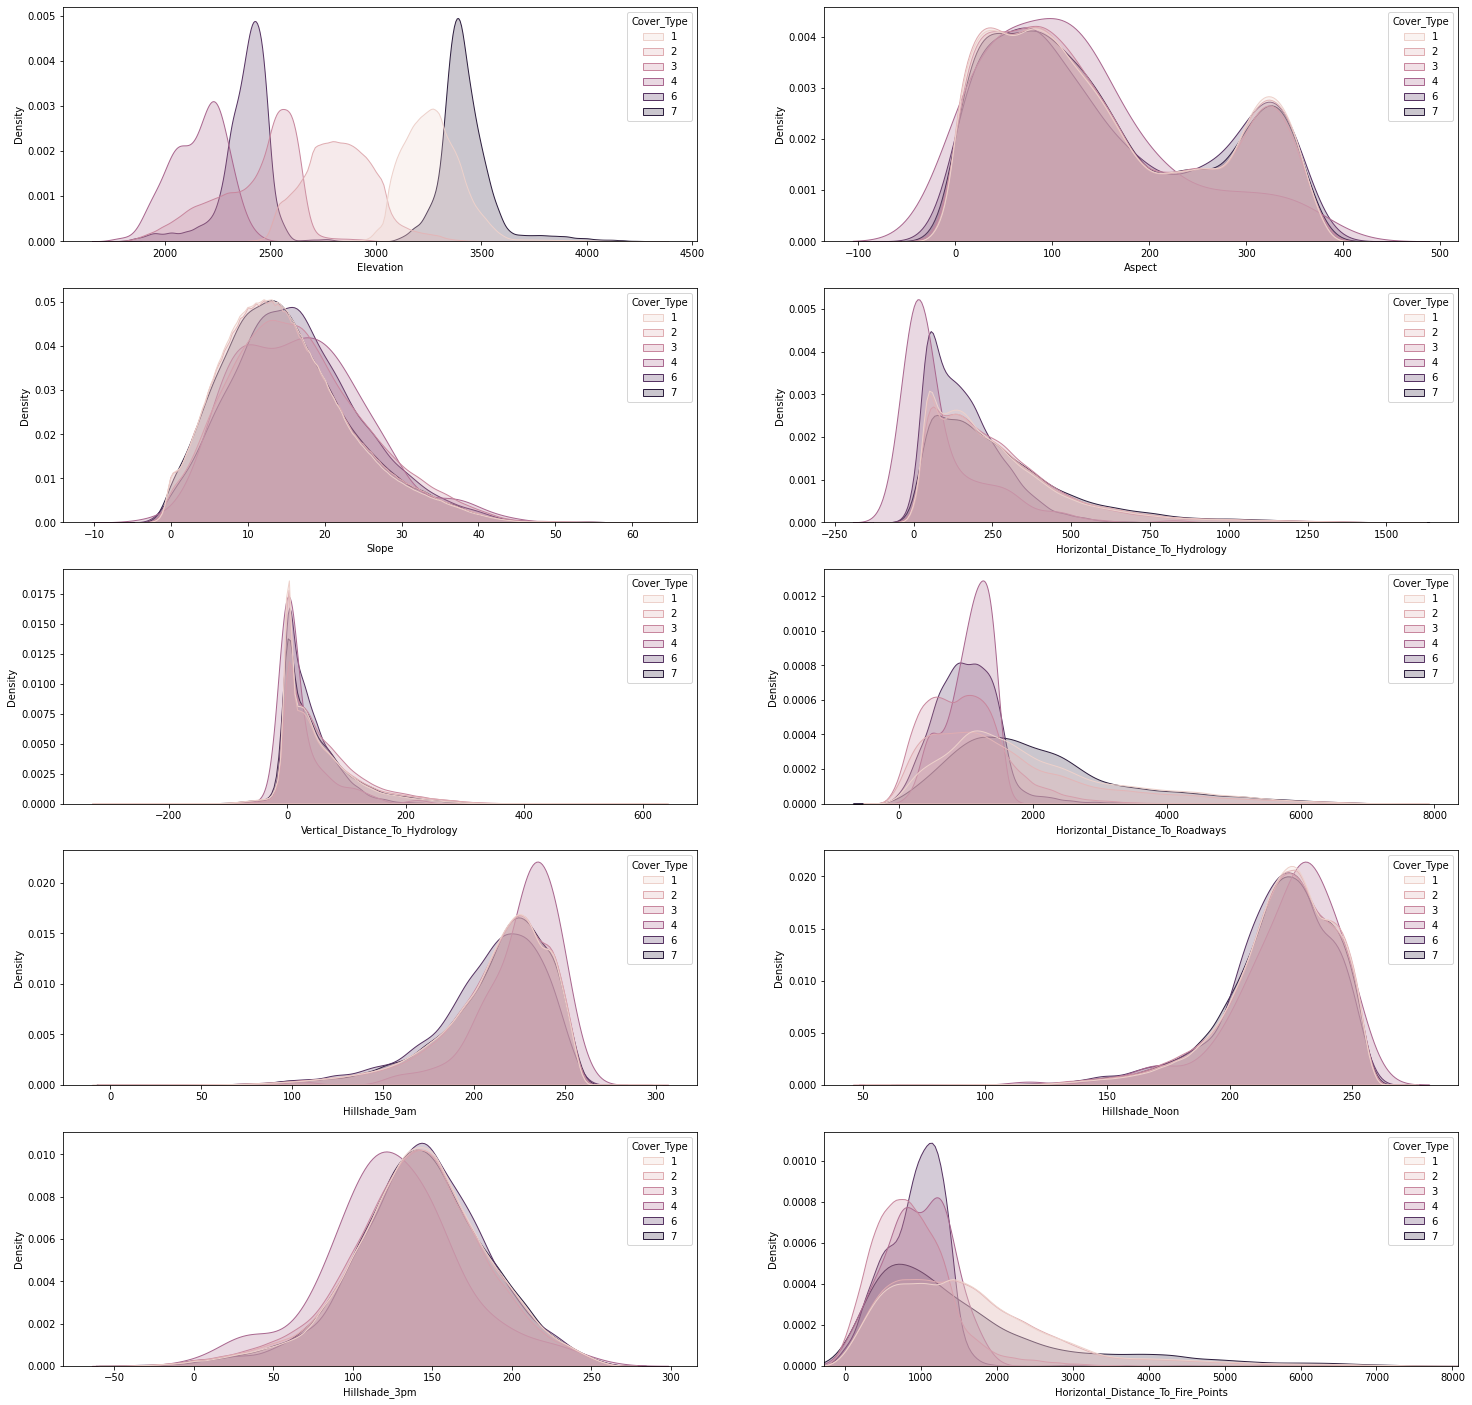

In [12]:
plot_distribution_by_category(train_df[train_df['Cover_Type'] != 5])

From the above graph we can clearly see that Elevation is an important feature giving great distinction between forst cover types.

Let us now examine the distribution of categorical variables by cover type. We are plotting bar graph of count of categories for each forest type. Starting with soild features.

In [13]:
def plot_soil_count_by_cover_type(train_df):
    fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(25,25))
    axis = axis.flatten()
    ax_i = 0
    
    for soil_id in range(1,8):
        if soil_id  == 5:
            continue
        soil_count_df = pd.DataFrame()
        soil_count_df['soil_id'] = range(1,41)
        soil_count_df['count'] = train_df[train_df['Cover_Type'] == soil_id][soil_features].sum(axis=0).tolist()   
        sns.barplot(data=soil_count_df,x='soil_id',y='count',ax=axis[ax_i])
        axis[ax_i].set_xticks([ 1,  6, 11, 16, 21, 26, 31, 36])
        axis[ax_i].set_title('Cover_Type ' + str(soil_id))
        ax_i = ax_i + 1

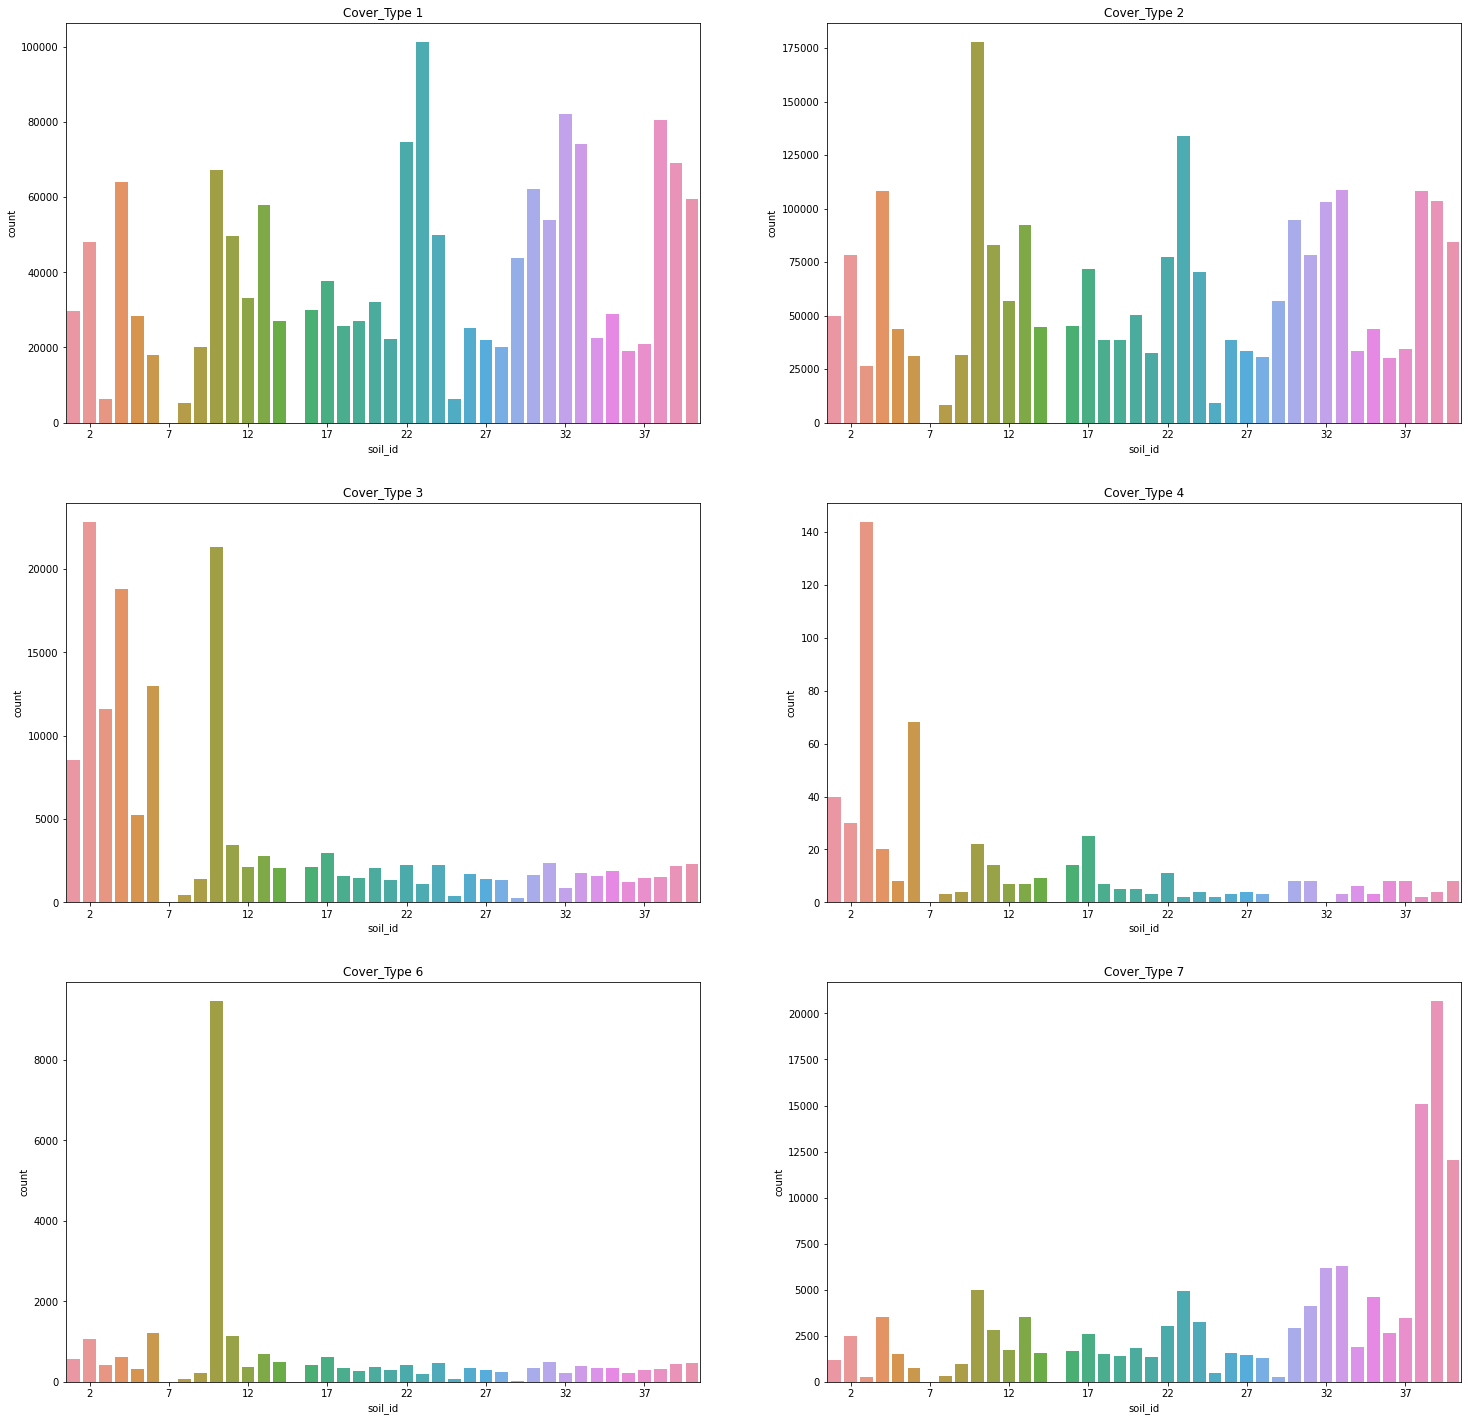

In [14]:
plot_soil_count_by_cover_type(train_df)

Let us also visually examine the distributin of wilderness across forest type in a similar manner.

In [15]:
def plot_wild_count_by_cover_type(train_df):
    fig, axis = plt.subplots(nrows=3,ncols=2,figsize=(25,25))
    axis = axis.flatten()
    ax_i = 0
    
    for wild_id in range(1,8):
        if wild_id == 5:
            continue
        wild_count_df = pd.DataFrame()
        wild_count_df['wild_id'] = range(1,5)
        wild_count_df['count'] = train_df[train_df['Cover_Type'] == wild_id][wild_features].sum(axis=0).tolist()   
        sns.barplot(data=wild_count_df,x='wild_id',y='count',ax=axis[ax_i])
        axis[ax_i].set_title('Cover_Type ' + str(wild_id))
        ax_i = ax_i + 1

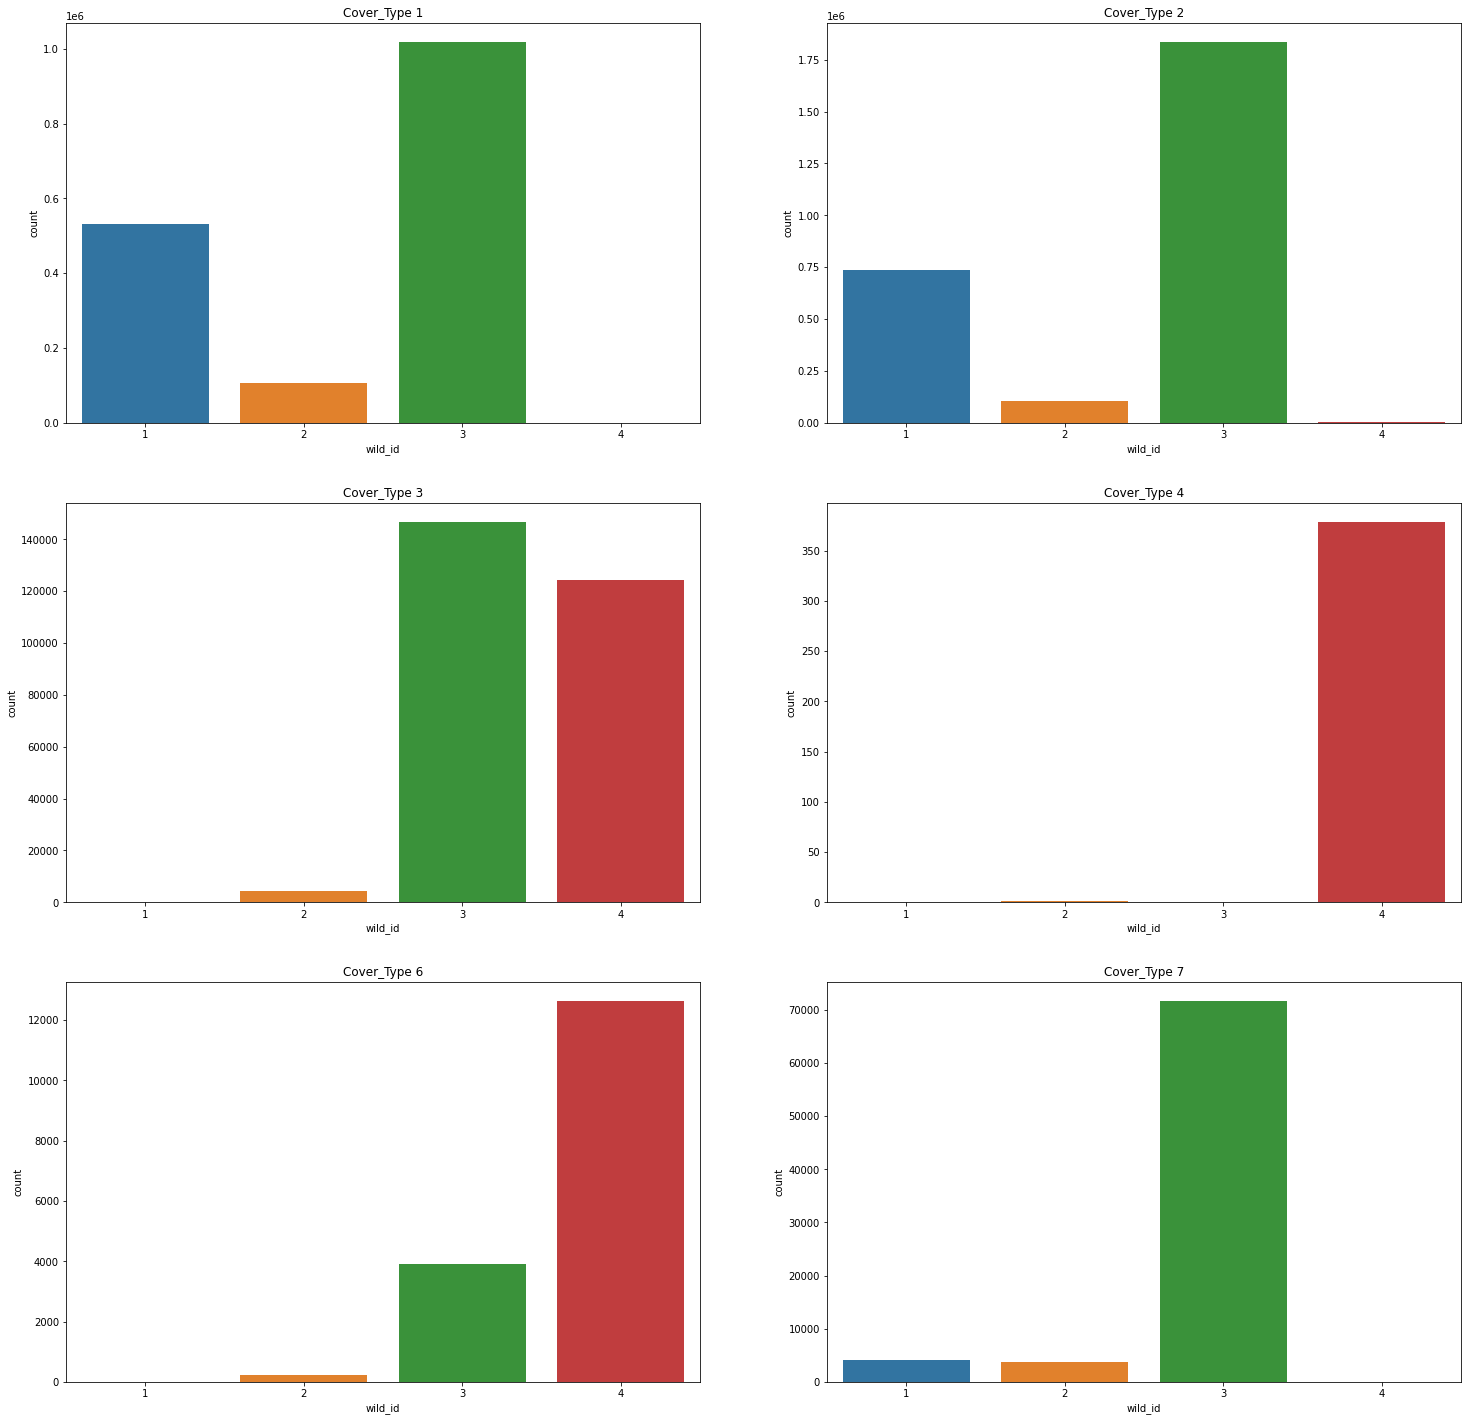

In [16]:
plot_wild_count_by_cover_type(train_df)

#### Feature Engineering
###### 1. Clipping of -ve values from distance based metrics.
###### 2. Clip the values of angle and hillshade metrics in 0-255 and 0-360
###### 3. Introduce count of soil_type present and wild_area present as features
###### 4. Add l1 and l2 distance metrics using vertical and horizontal distances
###### 5. Add avg hillshade index

In [17]:
if 'train_df_modified' in globals():
    del train_df_modified
if 'test_df_modified' in globals():
    del test_df_modified

train_df_modified = train_df.copy(deep=True)
test_df_modified = test_df.copy(deep=True)

In [18]:
train_df_modified[distance_features] = train_df_modified[distance_features].clip(lower=0)
train_df_modified[hillshade_features] = train_df_modified[hillshade_features].clip(lower=0,upper=255)
train_df_modified['Aspect'][train_df_modified['Aspect'] < 0] += 360
train_df_modified['Aspect'][train_df_modified['Aspect'] >= 360] -= 360
train_df_modified['Slope'][train_df_modified['Slope'] < 0] += 360
train_df_modified['Slope'][train_df_modified['Slope'] >= 360] -= 360


test_df_modified[distance_features] = test_df_modified[distance_features].clip(lower=0)
test_df_modified[hillshade_features] = test_df_modified[hillshade_features].clip(lower=0,upper=255)
test_df_modified['Aspect'][test_df_modified['Aspect'] < 0] += 360
test_df_modified['Aspect'][test_df_modified['Aspect'] >= 360] -= 360
test_df_modified['Slope'][test_df_modified['Slope'] < 0] += 360
test_df_modified['Slope'][test_df_modified['Slope'] >= 360] -= 360


train_df_modified['mhtn_hydr_dist'] = np.abs(train_df_modified['Horizontal_Distance_To_Hydrology']) + np.abs(train_df_modified['Vertical_Distance_To_Hydrology'])
test_df_modified['mhtn_hydr_dist'] = np.abs(test_df_modified['Horizontal_Distance_To_Hydrology']) + np.abs(test_df_modified['Vertical_Distance_To_Hydrology'])

train_df_modified['eucd_hydr_dist'] = np.sqrt((train_df_modified['Horizontal_Distance_To_Hydrology'].astype(np.int32))**2 + 
                                        (train_df_modified['Vertical_Distance_To_Hydrology'].astype(np.int32))**2)
test_df_modified['eucd_hydr_dist'] = np.sqrt((test_df_modified['Horizontal_Distance_To_Hydrology'].astype(np.int32))**2 + 
                                        (test_df_modified['Vertical_Distance_To_Hydrology'].astype(np.int32))**2)


train_df_modified['mhtn_hydr_dist'] = np.abs(train_df_modified['Horizontal_Distance_To_Hydrology']) + np.abs(train_df_modified['Vertical_Distance_To_Hydrology'])
test_df_modified['mhtn_hydr_dist'] = np.abs(test_df_modified['Horizontal_Distance_To_Hydrology']) + np.abs(test_df_modified['Vertical_Distance_To_Hydrology'])

train_df_modified['eucd_hydr_dist'] = np.sqrt((train_df_modified['Horizontal_Distance_To_Hydrology'].astype(np.int32))**2 + 
                                        (train_df_modified['Vertical_Distance_To_Hydrology'].astype(np.int32))**2)
test_df_modified['eucd_hydr_dist'] = np.sqrt((test_df_modified['Horizontal_Distance_To_Hydrology'].astype(np.int32))**2 + 
                                        (test_df_modified['Vertical_Distance_To_Hydrology'].astype(np.int32))**2)


train_df_modified['soil_count'] = train_df_modified[soil_features].sum(axis=1)
train_df_modified['wild_count'] = train_df_modified[wild_features].sum(axis=1)

test_df_modified['soil_count'] = test_df_modified[soil_features].sum(axis=1)
test_df_modified['wild_count'] = test_df_modified[wild_features].sum(axis=1)

train_df_modified['avg_hillshade_index'] = train_df_modified[hillshade_features].mean(axis=1)
test_df_modified['avg_hillshade_index'] = test_df_modified[hillshade_features].mean(axis=1)

if 'Soil_Type7' in train_df_modified.columns and 'Soil_Type15' in train_df_modified.columns and 'Id' in train_df_modified.columns:
    train_df_modified = train_df_modified.drop(columns=['Soil_Type7','Soil_Type15','Id'])
if 'Soil_Type7' in test_df_modified.columns and 'Soil_Type15' in test_df_modified.columns and 'Id' in test_df_modified.columns:
    test_df_modified = test_df_modified.drop(columns=['Soil_Type7','Soil_Type15','Id'])


In [19]:
if 'train_df' in globals():
    del train_df
if 'test_df' in globals():
    del test_df

#### Memory Usage Reduction

In [20]:
## The following function has been leveraged from an existing notebook
def reduce_mem_usage(df, verbose=True):
    """
    Reduce memory usage by downcasting features.
    
    Args:
        df (pd.DataFrame): DataFrame with features.
        verbose (bool): Determines verbosity of output.
    Returns:
        df (pd.DataFrame): DataFrame with reduces memory usage, due to smaller datatypes.
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [21]:
train_df_red = reduce_mem_usage(train_df_modified)
test_df_red = reduce_mem_usage(test_df_modified)

Mem. usage decreased to 356.53 Mb (83.8% reduction)
Mem. usage decreased to 70.57 Mb (83.8% reduction)


In [22]:
if 'train_df_modified' in globals():
    del train_df_modified
if 'test_df_modified' in globals():
    del test_df_modified

In [23]:
scaler = RobustScaler()
encoder = LabelEncoder() #Relabeling from 0 to 5

In [24]:
X = train_df_red[train_df_red['Cover_Type'] != 5].drop(columns=['Cover_Type'])
y = train_df_red[train_df_red['Cover_Type'] != 5]['Cover_Type']
test_X = test_df_red

X = scaler.fit_transform(X)
test_X = scaler.transform(test_X)
y = encoder.fit_transform(y)

In [ ]:
model = CatBoostClassifier(iterations=5000,
                          task_type="GPU",
                          devices="0:1")
model.fit(X,y)

In [26]:
# xgb_params = {
#     'objective': 'multi:softmax',
#     'eval_metric': 'mlogloss', 
#     'tree_method': 'gpu_hist',
#     'predictor': 'gpu_predictor',
#     }

# VC = VotingClassifier(estimators = [('xgb',XGBClassifier(**xgb_params)),
#                                     ('lgbm_gdbt',LGBMClassifier(n_jobs=4)),
#                                     ('lgbm_dart',LGBMClassifier(boosting_type='dart',n_jobs=4)),
#                                     ('lgbm_goss',LGBMClassifier(boosting_type='goss',n_jobs=4))],
#                      voting='soft',flatten_transform=True,verbose=True)

In [27]:
#VC.fit(X,y)

In [28]:
pred_y = encoder.inverse_transform(model.predict(test_X)) # reversing back to original labels

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:154: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
sample_submission = pd.DataFrame(data=range(4000000,5000000),columns=['Id'])
sample_submission['Cover_Type'] = pd.DataFrame(data=pred_y,columns=['1'])['1']
sample_submission

,Id,Cover_Type
0,4000000,2
1,4000001,2
2,4000002,2
3,4000003,2
4,4000004,2
...,...,...
999995,4999995,2
999996,4999996,1
999997,4999997,2
999998,4999998,1


In [30]:
sample_submission.to_csv(path_or_buf='./submission.csv',index=False)